## Download the data and extracting the archive
We will donwload and extarct the training WAV audio files from the TAR file.
This needed if you have only downlaoded the notebook(s) on your local computer or running in Google Collab.
However, if you have cloned the entire GitHub repo, you may skip this step as the extracted WAV files are already buldled withing the repo.

In [3]:
import librosa, os, IPython, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa.display

In [ ]:
!mkdir genres
!wget http://opihi.cs.uvic.ca/sound/genres.tar.gz
!tar -xf file_name.tar -C genres

In [15]:
#Get list of files grouped by genres in a dict
genre_files={dir:sorted(glob.glob('genres/'+dir+'/*.wav')) for dir in next(os.walk('genres'))[1]}

## Understanding the audio data and visualzing the features
This is only for undersatanding purpose. You may skip directly to Extaction part.

In [14]:
#reading one file
audio_file=genre_files['rock'][0]
(sig, sr) = librosa.load(audio_file, sr=None)

In [7]:
#Lets hear it first
IPython.display.Audio(audio_file)

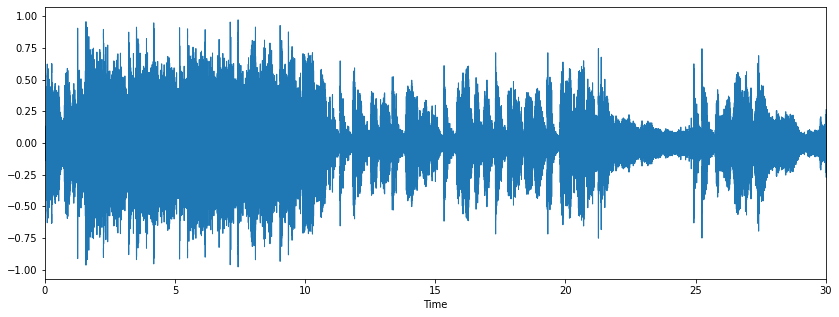

In [8]:
#Display the audio
plt.figure(figsize=(14, 5))
librosa.display.waveplot(sig, sr=sr)

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:1642: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  "amplitude_to_db was called on complex input so phase "


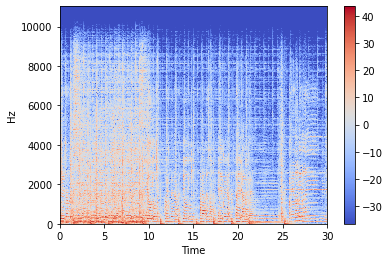

In [9]:
#plotting spectrogram
sig_db=librosa.amplitude_to_db(librosa.stft(sig))
librosa.display.specshow(sig_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

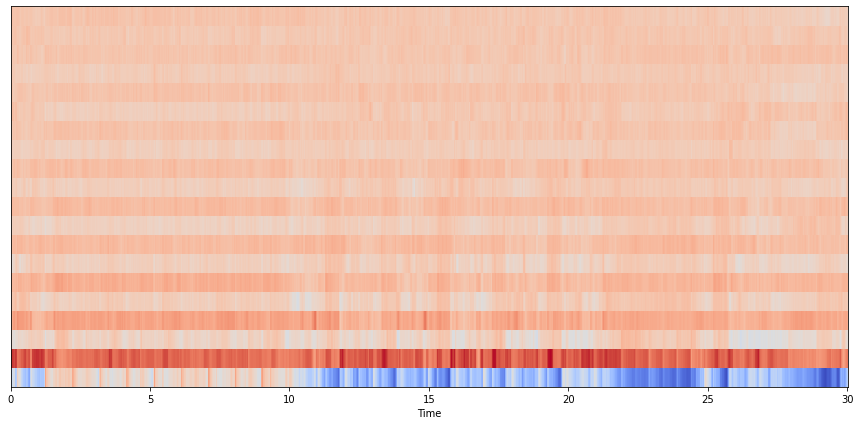

In [10]:
#Plotting 20 MFCC features accross time axis
mfcc=librosa.feature.mfcc(y=sig, sr=sr,n_mfcc=20)
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfcc[0:], sr=sr, x_axis='time',)

## Extracting the features from audio files

In [11]:
#Defining a function to extarct a list of features for a given audio 'file' and no. of desired MFCC features to extract
def get_features(file=None,n_mfcc=20):
    features={'file':file}
    if not file:
        (sig, sr)=(np.array([0.0]), 1.0)
    else:
        (sig, sr) = librosa.load(file, sr=None)
    mfcc=np.mean(librosa.feature.mfcc(sig, sr=sr,n_mfcc=n_mfcc),axis=1)
    for i in range(len(mfcc)):
        features['mfcc_'+str(i+1)] = mfcc[i]
    features['bandwidth'] = np.mean(librosa.feature.spectral_bandwidth(sig, sr=sr))
    features['rolloff'] = np.mean(librosa.feature.spectral_rolloff(sig, sr=sr))
    features['zero_cross'] = np.mean(librosa.feature.zero_crossing_rate(sig))
    features['chroma'] = np.mean(librosa.feature.chroma_stft(sig, sr=sr))
    features['centroid'] = np.mean(librosa.feature.spectral_centroid(sig, sr=sr))
    features['rms'] = np.mean(librosa.feature.rms(sig))
    return features

In [12]:
# Function to extract features for all files, putting in a Datframe and writing to CSV file 'genre_features.csv'
# Inputs are number of MFCC features to extatct and directory where the CSV files will be stored.

def ExtactAll(n_mfcc,csv_dir):
    headers=list(get_features(None,n_mfcc).keys())
    if not os.path.exists(csv_dir):
        os.makedirs(csv_dir)
    for genre in list(genre_files.keys()):
        print('Working on Genre: '+genre)
        df=pd.DataFrame(columns=headers)
        for file in genre_files[genre]:
            df=df.append(get_features(file,n_mfcc),ignore_index=True)
        df.to_csv(csv_dir+genre+'_features.csv',index=False)


In [ ]:
# Now wee start extraction features

ExtactAll(n_mfcc=20,csv_dir='mfcc_20/') # Exctcting 6 speectral pareametres + 20 MFCC coeffs.

#Trying out other combinations of paramters as well
ExtactAll(n_mfcc=10,csv_dir='mfcc_10/') # Exctcting 6 speectral pareametres + 10 MFCC coeffs.
ExtactAll(n_mfcc=5,csv_dir='mfcc_5/') # Exctcting 6 speectral pareametres + 5 MFCC coeffs.
ExtactAll(n_mfcc=40,csv_dir='mfcc_40/') # Exctcting 6 speectral pareametres + 20 MFCC coeffs.

We tried various combinaions of parameters, but found 20 to be optimal. So, we settled to using mfcc_20/ dataset